In [1]:
import json                                        # to work with json file
import pandas as pd                                # to work with dataframes
import numpy as np                                 # to work with numpy arrays
import gzip                                        # to extract work file from zip file
import nltk                                        # working with nlp algorithms
from nltk.sentiment import SentimentIntensityAnalyzer  # To predict the sentiments based on the text
from tqdm.notebook import tqdm                     # library for adding progress bar
import sklearn                                     # to working with machine learning algorithms
from sklearn.linear_model import LogisticRegression  # Classification algorithm
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer # To convert text to numerical based on tfidf score
from nltk.corpus import stopwords                  # to detect stopwords
import re                                          # To remove the unwanted text
from sklearn.metrics import classification_report  # Classification report
from sklearn.metrics import accuracy_score         # evaluation metric
from sklearn.metrics import f1_score               # evaluation metric
from sklearn.metrics import recall_score           # evaluation metric
from sklearn.metrics import precision_score        # evaluation metric
from sklearn.model_selection import train_test_split # train test split
import time                                        # to check the processing time
from sklearn.preprocessing import LabelEncoder     # To convert categorical to numerical
import warnings
warnings.filterwarnings('ignore')                  # To ignore the warnings
from sklearn.model_selection import StratifiedKFold # Splitting
from sklearn.naive_bayes import MultinomialNB       # Naive bayes algorithm
import matplotlib.pyplot as plt                     # Visualization tool
import seaborn as sns                               # Visualization tool
from statsmodels.tsa.seasonal import seasonal_decompose            # Time series components
from statsmodels.tsa.stattools import adfuller                      # To find the stationarity of the data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf       # To plot ACF and PACF plots
from statsmodels.tsa.arima.model import ARIMA                       # To build the ARIMA model
from sklearn.metrics import mean_squared_error                      # To check the mean square error                                      
from statsmodels.tsa.statespace.sarimax import SARIMAX              # To build the sarimax model
from sklearn.neighbors import NearestNeighbors                      # KNN algorithm
from sklearn.metrics.pairwise import cosine_similarity              # Asign correlation between the features
import scipy.sparse                                                 #
from scipy.sparse import csr_matrix                                 # Correlation Matrix
from scipy.sparse.linalg import svds                                #
from sklearn.preprocessing import MinMaxScaler, StandardScaler      # For Scaling the data
from sklearn.cluster import KMeans                                  # For Cluster Formation  
from sklearn.feature_extraction.text import CountVectorizer         # For Vectorisation
from wordcloud import WordCloud, STOPWORDS                          # For Word Cloud
from sklearn import metrics                                         # For Matrics Algorithms
from sklearn.metrics import classification_report                   # For Classification Evaluation Report
from datetime import datetime, timedelta,date
from sklearn.metrics import confusion_matrix                        # It shows the tabel of probability values
from sklearn.metrics import plot_confusion_matrix                   # plot of confusion matrix
from sklearn.metrics import mean_squared_error # To check the mean square error 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv('Digi_Muse_data.csv')
df.head()

,Unnamed: 0,asin,title,overall,brand,rank,verified,reviewerID,reviewerName,reviewTime,price,style,category,also_buy,also_view,main_cat,similar_item,Review,Sentiment
0,0,7019098606,Live...Again,5,Brooklyn Tabernacle Choir,725231,True,A2KLYLMS27MMSX,C. oliver,2014-12-12,13.71,Format Audio CD,[],"['B00004R8SJ', 'B00SLEJI78', 'B000002MJ3', 'B0...","['B00004R8SJ', 'B079PDJSRJ', 'B00SLEJI78', 'B0...","<img src=""https://images-na.ssl-images-amazon....",NaN,brooklyn tab not beat gospel music sing kind w...,Positive
1,1,7019098606,Live...Again,5,Brooklyn Tabernacle Choir,725231,True,A1IOEZDAZD6X51,Raf,2014-12-09,13.71,Format Audio CD,[],"['B00004R8SJ', 'B00SLEJI78', 'B000002MJ3', 'B0...","['B00004R8SJ', 'B079PDJSRJ', 'B00SLEJI78', 'B0...","<img src=""https://images-na.ssl-images-amazon....",NaN,greatfive star,Neutral
2,2,7019098606,Live...Again,5,Brooklyn Tabernacle Choir,725231,True,A1LUTAW6O69PQP,Paula Milo-Moultrie,2014-12-05,13.71,Format Audio CD,[],"['B00004R8SJ', 'B00SLEJI78', 'B000002MJ3', 'B0...","['B00004R8SJ', 'B079PDJSRJ', 'B00SLEJI78', 'B0...","<img src=""https://images-na.ssl-images-amazon....",NaN,music inspire enjoy listen singing alongi enjo...,Positive
3,3,7019098606,Live...Again,5,Brooklyn Tabernacle Choir,725231,True,A1UUCVS78RELYW,jadamtam,2014-09-29,13.71,Format Audio CD,[],"['B00004R8SJ', 'B00SLEJI78', 'B000002MJ3', 'B0...","['B00004R8SJ', 'B079PDJSRJ', 'B00SLEJI78', 'B0...","<img src=""https://images-na.ssl-images-amazon....",NaN,beautiful songsfive star,Positive
4,4,7019098606,Live...Again,5,Brooklyn Tabernacle Choir,725231,True,A1E2OY42QMGRXR,Chester Thrash,2014-09-06,13.71,Format Audio Cassette,[],"['B00004R8SJ', 'B00SLEJI78', 'B000002MJ3', 'B0...","['B00004R8SJ', 'B079PDJSRJ', 'B00SLEJI78', 'B0...","<img src=""https://images-na.ssl-images-amazon....",NaN,favorite love iti love,Positive


In [3]:
df.isnull().sum()

Unnamed: 0          0
asin                0
title             591
overall             0
brand            7590
rank                0
verified            0
reviewerID          0
reviewerName        1
reviewTime          0
price               0
style               0
category            0
also_buy            0
also_view           0
main_cat            0
similar_item    79501
Review              2
Sentiment           0
dtype: int64

In [4]:
df.drop(['similar_item'],axis=1 ,inplace=True)

In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(71391, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71391 entries, 0 to 79500
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    71391 non-null  int64  
 1   asin          71391 non-null  object 
 2   title         71391 non-null  object 
 3   overall       71391 non-null  int64  
 4   brand         71391 non-null  object 
 5   rank          71391 non-null  int64  
 6   verified      71391 non-null  bool   
 7   reviewerID    71391 non-null  object 
 8   reviewerName  71391 non-null  object 
 9   reviewTime    71391 non-null  object 
 10  price         71391 non-null  float64
 11  style         71391 non-null  object 
 12  category      71391 non-null  object 
 13  also_buy      71391 non-null  object 
 14  also_view     71391 non-null  object 
 15  main_cat      71391 non-null  object 
 16  Review        71391 non-null  object 
 17  Sentiment     71391 non-null  object 
dtypes: bool(1), float64(1), in

In [8]:
X = df["Review"]

In [9]:
y = df["Sentiment"]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state = 42)

In [11]:
vectorizer = CountVectorizer(min_df=5).fit(x_train)
X_train = vectorizer.transform(x_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<57112x18549 sparse matrix of type '<class 'numpy.int64'>'
	with 1410720 stored elements in Compressed Sparse Row format>


In [12]:
X_test = vectorizer.transform(x_test)

In [13]:
def model_evaluator(model):
    
    model.fit(X_train,y_train)
    y_pred= model.predict(X_test)
    
    acc_test= accuracy_score(y_test,y_pred,)
    rec= recall_score(y_test,y_pred,average="weighted")
    fs = f1_score(y_test,y_pred,average="weighted")
    ps= precision_score(y_test, y_pred,average="weighted")
    cfm = confusion_matrix(y_test, y_pred)
    
    print("Accuracy: ",acc_test)
    print("Recall Score: ", rec)
    print("f1_score: ",fs)  
    print("Precision score: ",ps)   
    

    print()
    print("\t\t\tClassification Report")
    print("--"*50)
    print(classification_report(y_test,y_pred))
    print("\n confusion_matrix: \n",cfm)
    
    return acc_test,rec,fs,ps,cfm

In [14]:
logi_model = LogisticRegression()

In [15]:
acc_test_lr,rec_lr,fs_lr,ps_lr,cfm_lr=model_evaluator(logi_model)

Accuracy:  0.9536382099586805
Recall Score:  0.9536382099586805
f1_score:  0.9513832243649517
Precision score:  0.9509809249780047

			Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.74      0.56      0.64       830
     Neutral       0.90      0.97      0.94      1696
    Positive       0.97      0.98      0.98     11753

    accuracy                           0.95     14279
   macro avg       0.87      0.84      0.85     14279
weighted avg       0.95      0.95      0.95     14279


 confusion_matrix: 
 [[  464    76   290]
 [    9  1652    35]
 [  151   101 11501]]


## Decision Tree

In [16]:
dtree_model = DecisionTreeClassifier()

In [17]:
acc_test_dt,rec_dt,fs_dt,ps_dt,cfm_dt=model_evaluator(dtree_model)

Accuracy:  0.9295468870369074
Recall Score:  0.9295468870369074
f1_score:  0.9271886975970816
Precision score:  0.9257413313455239

			Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.53      0.43      0.48       830
     Neutral       0.88      0.95      0.92      1696
    Positive       0.96      0.96      0.96     11753

    accuracy                           0.93     14279
   macro avg       0.79      0.78      0.78     14279
weighted avg       0.93      0.93      0.93     14279


 confusion_matrix: 
 [[  359    62   409]
 [   20  1617    59]
 [  299   157 11297]]


### Random Forest

In [18]:
rf_model = RandomForestClassifier()

In [19]:
acc_test_rf,rec_rf,fs_rf,ps_rf,cfm_rf=model_evaluator(rf_model)

Accuracy:  0.9200924434484208
Recall Score:  0.9200924434484208
f1_score:  0.8991877432302765
Precision score:  0.9199138144154745

			Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.93      0.09      0.16       830
     Neutral       0.87      0.86      0.86      1696
    Positive       0.93      0.99      0.96     11753

    accuracy                           0.92     14279
   macro avg       0.91      0.65      0.66     14279
weighted avg       0.92      0.92      0.90     14279


 confusion_matrix: 
 [[   74    80   676]
 [    0  1457   239]
 [    6   140 11607]]


### K-Neighbors

In [20]:
from sklearn.neighbors import KNeighborsClassifier
kn_model=KNeighborsClassifier()

In [21]:
acc_test_kn,rec_kn,fs_kn,ps_kn,cfm_kn=model_evaluator(kn_model)

Accuracy:  0.7966244134743329
Recall Score:  0.7966244134743329
f1_score:  0.8076977822681991
Precision score:  0.8607605734692945

			Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.32      0.11      0.16       830
     Neutral       0.41      0.96      0.57      1696
    Positive       0.96      0.82      0.89     11753

    accuracy                           0.80     14279
   macro avg       0.57      0.63      0.54     14279
weighted avg       0.86      0.80      0.81     14279


 confusion_matrix: 
 [[  89  443  298]
 [   6 1627   63]
 [ 180 1914 9659]]


In [22]:
model_name= ["LogisticRegression","DecisionTreeClassifier","Knn - Classifier","Random Forest Classifire"]

Accuracy=[acc_test_lr,acc_test_dt,acc_test_kn,acc_test_rf]
recall_score=[rec_lr,rec_dt,rec_kn,rec_rf]
f1_score=[fs_lr,fs_dt,fs_kn,fs_rf]
precision_score=[ps_lr,ps_dt,ps_kn,ps_rf]


data= {"Accuracy":Accuracy,
              "recall_score":recall_score,
              "f1_score":f1_score,
              "precision_score":precision_score,}

dff=pd.DataFrame(data, index=model_name)
dff

,Accuracy,recall_score,f1_score,precision_score
LogisticRegression,0.953638,0.953638,0.951383,0.950981
DecisionTreeClassifier,0.929547,0.929547,0.927189,0.925741
Knn - Classifier,0.796624,0.796624,0.807698,0.860761
Random Forest Classifire,0.920092,0.920092,0.899188,0.919914


- From the above Comparison Report we understand that out of all the 3 classification models Logistic Regression gives us the best output.

## Prediction

In [23]:
logi_model.predict(vectorizer.transform(['love cd il volo young man true gift lucky sharing I m look forward hear operatic poplove cd il volo']))

array(['Positive'], dtype=object)

In [24]:
logi_model.predict(vectorizer.transform(['excellentttttfive star']))

array(['Neutral'], dtype=object)

In [25]:
logi_model.predict(vectorizer.transform(['tape break order broken tape']))

array(['Negative'], dtype=object)

### Remove text-Stop words
Coming to stop words, general nltk stop words contains words like not,hasn't,would'nt which actually conveys a negative sentiment. If we remove that it will end up contradicting the target variable(sentiment). So I have curated the stop words which doesn't have any negative sentiment or any negative alternatives.

In [26]:
# Getting stop words
nltk.download('stopwords')

stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ARCHIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
# applying stopword function on reviewText
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [28]:
# For WordCloud
stopwords = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "black",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(str(df['Review']))
    fig = plt.figure(figsize = (15, 15))
    plt.axis("off")
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.25)
    plt.imshow(wordcloud)
    plt.show()

In [29]:
df.columns

Index(['Unnamed: 0', 'asin', 'title', 'overall', 'brand', 'rank', 'verified',
       'reviewerID', 'reviewerName', 'reviewTime', 'price', 'style',
       'category', 'also_buy', 'also_view', 'main_cat', 'Review', 'Sentiment'],
      dtype='object')

In [30]:
neg=df[df["Sentiment"] == "Neg"]["Review"]
pos=df[df["Sentiment"] == "Pos"]["Review"]
neu=df[df["Sentiment"] == "Neutral"]["Review"]

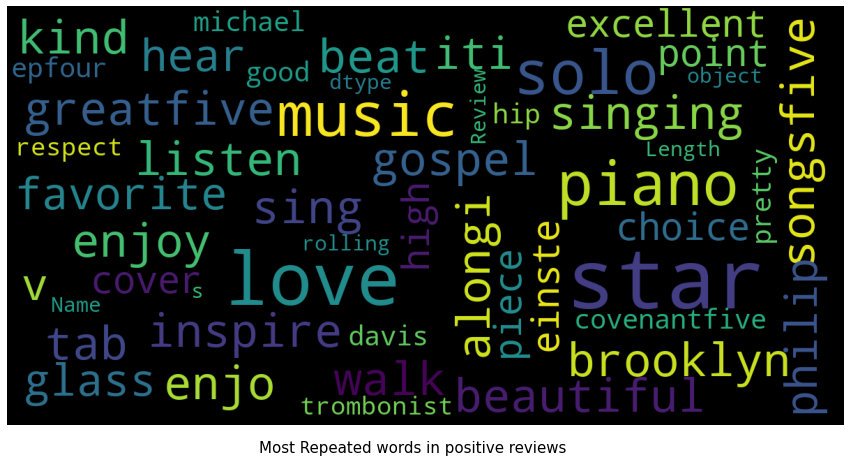

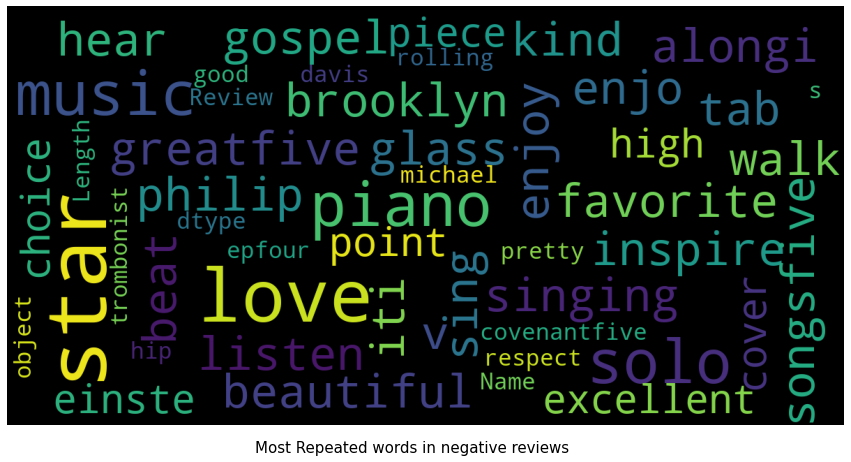

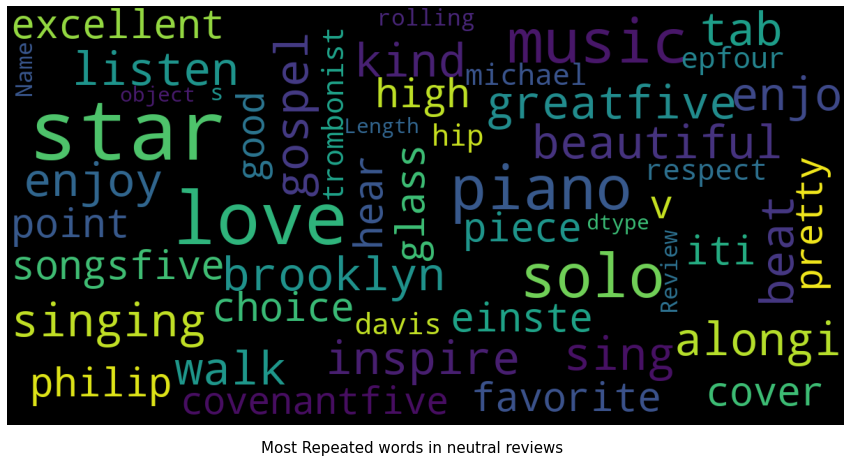

In [31]:
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")
word_cloud(neu, "Most Repeated words in neutral reviews")

### <div class="alert alert-info">Interpretation
**- From the above plots we can see that most used positive, negative and neutral words from the Review column**</div>

## &#10148; Clustering</br>
- Cluster analysis is the grouping of objects such that objects in the same cluster are more similar to each other than they are to objects in another cluster. The classification into clusters is done using criteria such as smallest distances, density of data points, graphs, or various statistical distributions.

In [32]:
df["reviewTime"] = pd.to_datetime(df["reviewTime"])

In [33]:
# Convert the datetime column to Unix timestamps
df['unixReviewTime'] = (pd.DatetimeIndex(df['reviewTime']).astype('int64') // 10**9)

# Print the resulting DataFrame
df

,Unnamed: 0,asin,title,overall,brand,rank,verified,reviewerID,reviewerName,reviewTime,price,style,category,also_buy,also_view,main_cat,Review,Sentiment,unixReviewTime
0,0,7019098606,Live...Again,5,Brooklyn Tabernacle Choir,725231,True,A2KLYLMS27MMSX,C. oliver,2014-12-12,13.71,Format Audio CD,[],"['B00004R8SJ', 'B00SLEJI78', 'B000002MJ3', 'B0...","['B00004R8SJ', 'B079PDJSRJ', 'B00SLEJI78', 'B0...","<img src=""https://images-na.ssl-images-amazon....",brooklyn tab beat gospel music sing kind walk ...,Positive,1418342400
1,1,7019098606,Live...Again,5,Brooklyn Tabernacle Choir,725231,True,A1IOEZDAZD6X51,Raf,2014-12-09,13.71,Format Audio CD,[],"['B00004R8SJ', 'B00SLEJI78', 'B000002MJ3', 'B0...","['B00004R8SJ', 'B079PDJSRJ', 'B00SLEJI78', 'B0...","<img src=""https://images-na.ssl-images-amazon....",greatfive star,Neutral,1418083200
2,2,7019098606,Live...Again,5,Brooklyn Tabernacle Choir,725231,True,A1LUTAW6O69PQP,Paula Milo-Moultrie,2014-12-05,13.71,Format Audio CD,[],"['B00004R8SJ', 'B00SLEJI78', 'B000002MJ3', 'B0...","['B00004R8SJ', 'B079PDJSRJ', 'B00SLEJI78', 'B0...","<img src=""https://images-na.ssl-images-amazon....",music inspire enjoy listen singing alongi enjo...,Positive,1417737600
3,3,7019098606,Live...Again,5,Brooklyn Tabernacle Choir,725231,True,A1UUCVS78RELYW,jadamtam,2014-09-29,13.71,Format Audio CD,[],"['B00004R8SJ', 'B00SLEJI78', 'B000002MJ3', 'B0...","['B00004R8SJ', 'B079PDJSRJ', 'B00SLEJI78', 'B0...","<img src=""https://images-na.ssl-images-amazon....",beautiful songsfive star,Positive,1411948800
4,4,7019098606,Live...Again,5,Brooklyn Tabernacle Choir,725231,True,A1E2OY42QMGRXR,Chester Thrash,2014-09-06,13.71,Format Audio Cassette,[],"['B00004R8SJ', 'B00SLEJI78', 'B000002MJ3', 'B0...","['B00004R8SJ', 'B079PDJSRJ', 'B00SLEJI78', 'B0...","<img src=""https://images-na.ssl-images-amazon....",favorite love iti love,Positive,1409961600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79496,140814,B01HDRMCXK,Philip Glass - Prophecies,5,Anton Batagov,196423,False,A165B22J07IED1,Roland,2016-10-17,18.99,Format Audio CD,[],"['B075ZC8C25', 'B01EBIJTX0', 'B00TYDOA6O', 'B0...","['B07J35QFY6', 'B075ZC8C25', 'B07D95GL9V', 'B0...","<img src=""https://images-na.ssl-images-amazon....",like hear philip glass solo piano solo piano v...,Positive,1476662400
79497,140815,B01HDRMCXK,Philip Glass - Prophecies,5,Anton Batagov,196423,False,A1Q7UZQUCK4MD5,ABR,2016-10-05,18.99,Format Audio CD,[],"['B075ZC8C25', 'B01EBIJTX0', 'B00TYDOA6O', 'B0...","['B07J35QFY6', 'B075ZC8C25', 'B07D95GL9V', 'B0...","<img src=""https://images-na.ssl-images-amazon....",excellent choice piece cover high point einste...,Positive,1475625600
79498,140819,B01HF1Z5JW,Sound Mirrors,5,Covenant,323298,True,A3NV56DLGAK74H,L,2017-11-22,13.86,Format Audio CD,[],"['B01KI262EC', 'B07CLP4ZL4', 'B00E9E4HFW', 'B0...","['B00E9E4HFW', 'B00006J44B']","<img src=""https://images-na.ssl-images-amazon....",love covenantfive star,Positive,1511308800
79499,140820,B01HF1Z5JW,Sound Mirrors,4,Covenant,323298,True,AANTLC5FKVMLJ,StuartPercy,2016-12-01,13.86,Format Audio CD,[],"['B01KI262EC', 'B07CLP4ZL4', 'B00E9E4HFW', 'B0...","['B00E9E4HFW', 'B00006J44B']","<img src=""https://images-na.ssl-images-amazon....",pretty good epfour star,Positive,1480550400


In [34]:
X1 = df[['price', 'unixReviewTime']]

CPU times: total: 15.4 s
Wall time: 4.23 s


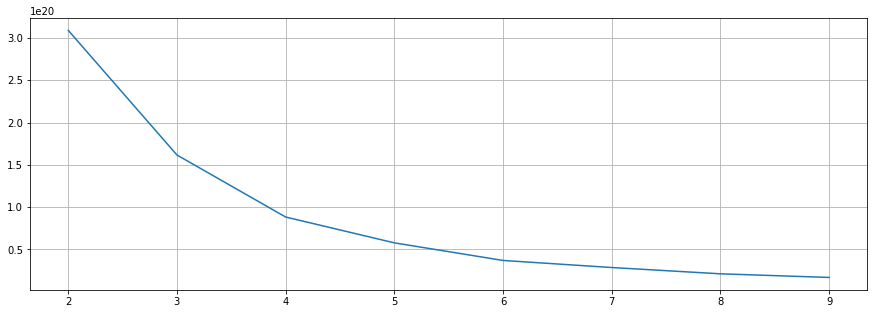

In [35]:
%%time
X1 = X1.values
distortion = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i).fit(X1)
    distortion.append(kmeans.inertia_)
plt.figure(figsize = (15, 5))
plt.plot(range(2, 10), distortion)
plt.grid(True)

###### Making the model and fitting it

In [36]:
%%time                                           
model1 = KMeans(n_clusters = 5, random_state = 10).fit(X1)
pred = model1.fit_predict(X1)

CPU times: total: 3.58 s
Wall time: 934 ms


In [37]:
df.columns

Index(['Unnamed: 0', 'asin', 'title', 'overall', 'brand', 'rank', 'verified',
       'reviewerID', 'reviewerName', 'reviewTime', 'price', 'style',
       'category', 'also_buy', 'also_view', 'main_cat', 'Review', 'Sentiment',
       'unixReviewTime'],
      dtype='object')

Text(0, 0.5, 'unixReviewTime')

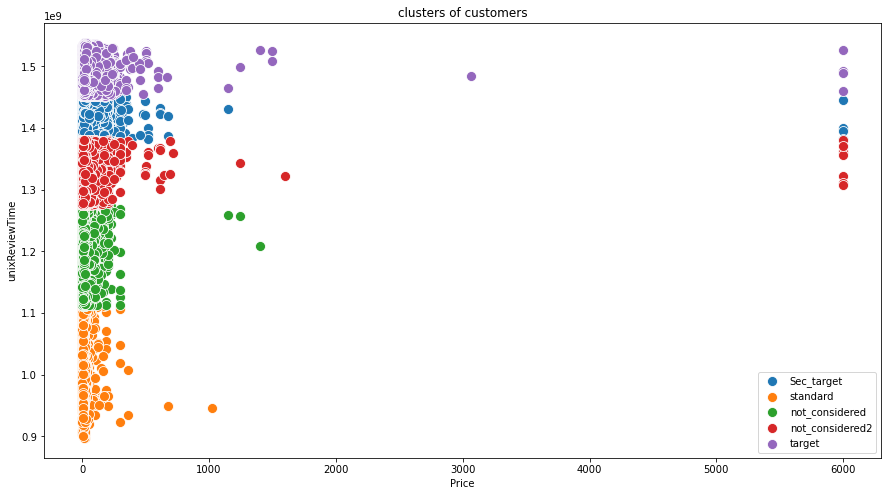

In [38]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=X1[pred==0,0] ,y=X1[pred==0,1] ,s=100,label="Sec_target")
sns.scatterplot(x=X1[pred==1,0] ,y=X1[pred==1,1],s=100,label="standard")
sns.scatterplot(x=X1[pred==2,0] ,y=X1[pred==2,1] ,s=100,label="not_considered")
sns.scatterplot(x=X1[pred==3,0] ,y=X1[pred==3,1],s=100,label="not_considered2")
sns.scatterplot(x=X1[pred==4,0] ,y=X1[pred==4,1],s=100,label="target")
#sns.scatterplot(x=kmeans.cluster_centers_[:,0] ,y= kmeans.cluster_centers_[:,1] ,s=300,label="center")
plt.title("clusters of customers")
plt.xlabel("Price")
plt.ylabel("unixReviewTime")

In [39]:
clus = df.copy()

In [40]:
# Assigning the clusters 
clusters=[]
for c in pred:
    if c==0:
        clusters.append("Sec_target")
    elif c==1:
        clusters.append("standard")
    elif c==2:
        clusters.append("not_considered")
    elif c==3:
        clusters.append("not_considered2")
    elif c==4:
        clusters.append("target") 
        
        
clus["clusters1"]=clusters

In [41]:
d1=clus[(clus["clusters1"]=='target')]
d1["overall"].value_counts()

5    17052
4     2109
3      983
1      911
2      451
Name: overall, dtype: int64

In [42]:
d2=clus[(clus["clusters1"]=='standard')]
d2["overall"].value_counts()

5    2420
4     518
3     132
1      94
2      52
Name: overall, dtype: int64

In [43]:
d3=clus[(clus["clusters1"]=='not_considered')]
d3["overall"].value_counts()

5    4907
4    1300
3     504
1     261
2     197
Name: overall, dtype: int64

In [44]:
d4=clus[(clus["clusters1"]=='Sec_target')]
d4["overall"].value_counts()

5    19255
4     2973
3     1356
1      981
2      631
Name: overall, dtype: int64

In [45]:
d5=clus[(clus["clusters1"]=='not_considered2')]
d5["overall"].value_counts()

5    10454
4     2143
3      881
1      466
2      360
Name: overall, dtype: int64

In [46]:
improve=clus[(clus["clusters1"]=='target') & (clus["overall"]<3)]

In [47]:
a=clus[(clus["clusters1"]=='target')]

In [48]:
# Recommending the products
improve['asin'].value_counts()[0:10]

B00NPZI1ZS    38
B01G4DH4AU    14
B000NP1OLQ    14
B00A8U014C    12
B004O4J4VE    11
B00L1N5J9C    11
B000MZAN0A    11
B01BKYPCIY    10
B00LPHKKIO     9
B019GR5N68     9
Name: asin, dtype: int64

In [49]:
improve1=clus[(clus["clusters1"]=='target') & (clus["overall"]==1)]
improve1['asin'].value_counts()[0:10]

B00NPZI1ZS    24
B000NP1OLQ    14
B00L1N5J9C    11
B01G4DH4AU    10
B004O4J4VE     9
B000MZAN0A     8
B00A8U014C     8
B018H3OTXA     7
B015ORYOLE     6
B00LPHKKIO     6
Name: asin, dtype: int64

In [50]:
improve2=clus[(clus["clusters1"]=='target') & (clus["overall"]==5)]
improve2['asin'].value_counts()[0:10]

B01B6X0QC6    272
B00A8U014C    263
B01BKYPCIY    190
B01AN3DNE8    165
B015KTSIP4    142
B00NPZI1ZS    129
B00NES1D6A    105
B01G4DH4AU    104
B016BYB17E     95
B017OOZHXO     94
Name: asin, dtype: int64

## &#10148; Customer segmentation</br>
- We can’t treat every customer the same way with the same content, same channel, same importance. They will find another option which understands them better.
- Customers who use your platform have different needs and they have their own different profile. Your should adapt your actions depending on that.
- You can do many different segmentations according to what you are trying to achieve. If you want to increase retention rate, you can do a segmentation based on the similarities between the customers
- But there are very common and useful segmentation methods as well. Now we are going to implement one of them to our business: RFM.
- **1. Recency: How recently customers made their purchase.**
- **2. Frequency: For simplicity, we’ll count the number of times each customer made a purchase.**
- **3. Monetary: How much money they spent in total.**

In [51]:
df.columns

Index(['Unnamed: 0', 'asin', 'title', 'overall', 'brand', 'rank', 'verified',
       'reviewerID', 'reviewerName', 'reviewTime', 'price', 'style',
       'category', 'also_buy', 'also_view', 'main_cat', 'Review', 'Sentiment',
       'unixReviewTime'],
      dtype='object')

In [52]:
CS_df = pd.DataFrame(df['reviewerID'].unique())
CS_df.columns = ['reviewerID']

In [53]:
Max_purchase = df.groupby('reviewerID').reviewTime.max().reset_index()
Max_purchase.columns = ['reviewerID','MaxPurchaseDate']

#### &#10148; Recency</br>

In [54]:
Max_purchase['Recency'] = (Max_purchase['MaxPurchaseDate'].max() - Max_purchase['MaxPurchaseDate']).dt.days

In [55]:
CS_df = pd.merge(CS_df, Max_purchase[['reviewerID','Recency']], on='reviewerID')
CS_df.head()

,reviewerID,Recency
0,A2KLYLMS27MMSX,1389
1,A1IOEZDAZD6X51,1392
2,A1LUTAW6O69PQP,1396
3,A1UUCVS78RELYW,1463
4,A1E2OY42QMGRXR,1486


#### &#10148; Frequency</br>

In [56]:
tx_frequency = df.groupby('reviewerID').reviewTime.count().reset_index()
tx_frequency.columns = ['reviewerID','Frequency']

In [57]:
CS_df = pd.merge(CS_df, tx_frequency, on='reviewerID')

#### &#10148; Revenue</br>

In [58]:
tx_revenue = df.groupby('reviewerID').price.sum().reset_index()

In [59]:
CS_df = pd.merge(CS_df, tx_revenue, on='reviewerID')

In [60]:
CS_df.head()

,reviewerID,Recency,Frequency,price
0,A2KLYLMS27MMSX,1389,1,13.71
1,A1IOEZDAZD6X51,1392,1,13.71
2,A1LUTAW6O69PQP,1396,1,13.71
3,A1UUCVS78RELYW,1463,1,13.71
4,A1E2OY42QMGRXR,1486,3,33.58


In [61]:
CS_df.isnull().sum()

reviewerID    0
Recency       0
Frequency     0
price         0
dtype: int64

#### &#10148; K_means</br>

In [62]:
a = CS_df.select_dtypes(exclude = 'object')
b = CS_df.select_dtypes(include = 'object')

In [63]:
a.columns

Index(['Recency', 'Frequency', 'price'], dtype='object')

In [64]:
CS_df

,reviewerID,Recency,Frequency,price
0,A2KLYLMS27MMSX,1389,1,13.71
1,A1IOEZDAZD6X51,1392,1,13.71
2,A1LUTAW6O69PQP,1396,1,13.71
3,A1UUCVS78RELYW,1463,1,13.71
4,A1E2OY42QMGRXR,1486,3,33.58
...,...,...,...,...
60562,A26PV8EBAUZSCP,490,1,30.89
60563,ANG4YPQG7E3HA,656,1,18.99
60564,A13FU7B96Y5GUX,679,1,18.99
60565,A1Q7UZQUCK4MD5,726,1,18.99


In [65]:
CS_df1 = CS_df.copy()

In [66]:
CS_df1.head()

,reviewerID,Recency,Frequency,price
0,A2KLYLMS27MMSX,1389,1,13.71
1,A1IOEZDAZD6X51,1392,1,13.71
2,A1LUTAW6O69PQP,1396,1,13.71
3,A1UUCVS78RELYW,1463,1,13.71
4,A1E2OY42QMGRXR,1486,3,33.58


In [67]:
# Scaling the data
%time
Scaler = StandardScaler()
for i in a.columns:
    CS_df1[i] = Scaler.fit_transform(np.array(CS_df[i]).reshape(-1, 1))

CPU times: total: 0 ns
Wall time: 0 ns


###### Getting optimum cluster number

In [68]:
%%time
X = CS_df1.drop(['reviewerID'], axis = 1).values
distortion = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i).fit(X)
    distortion.append(kmeans.inertia_)

CPU times: total: 11.9 s
Wall time: 3.16 s


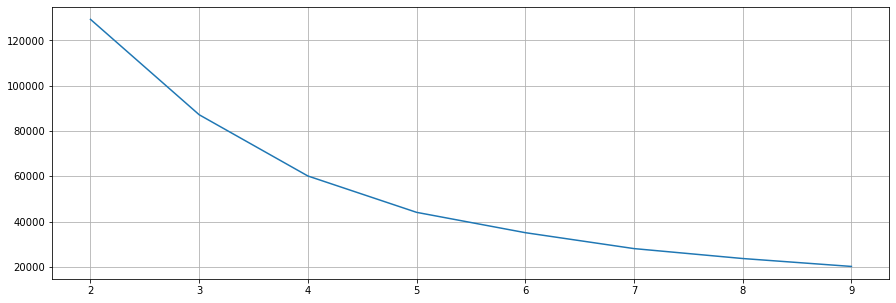

In [69]:
plt.figure(figsize = (15, 5))
plt.plot(range(2, 10), distortion)
plt.grid(True)

### <div class="alert alert-info">Interpretation
**- From the above elbow curve we can take k as 3 because the slope is more at k = 3**</div>

###### Creating Model and fitting it

In [70]:
%%time
model = KMeans(n_clusters = 3, random_state = 10).fit(X)
pred = model.fit_predict(X)

CPU times: total: 1.31 s
Wall time: 365 ms


In [71]:
CS_df.columns

Index(['reviewerID', 'Recency', 'Frequency', 'price'], dtype='object')

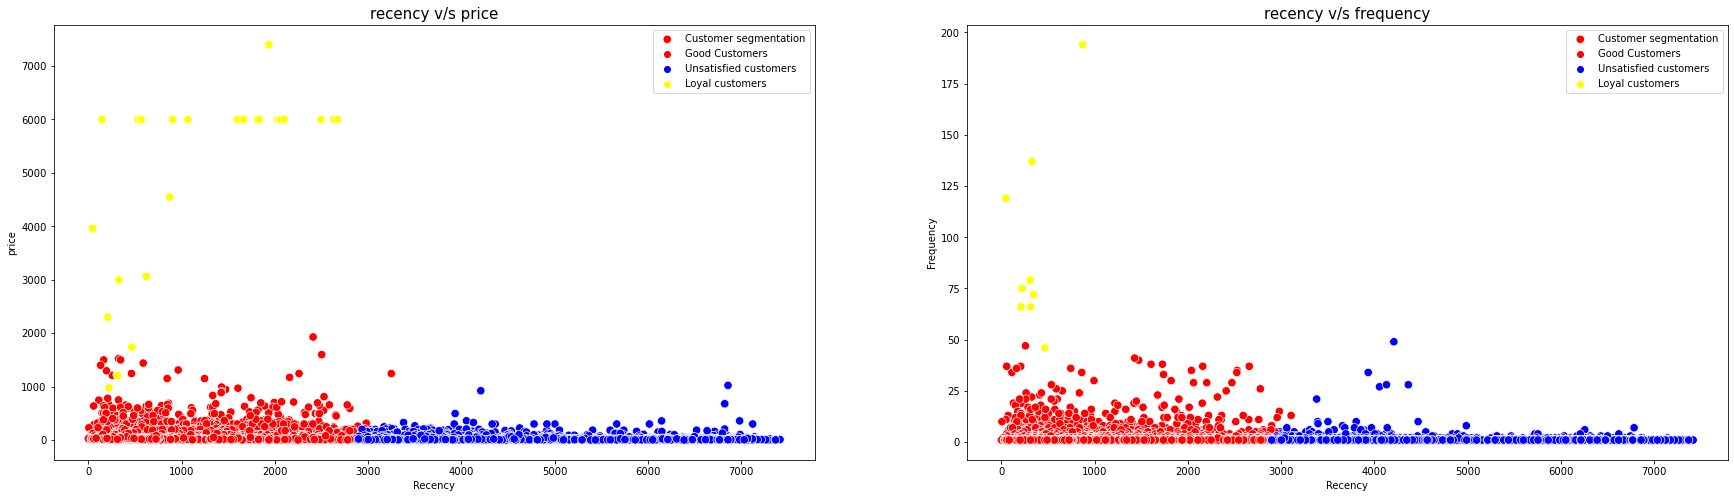

In [72]:
color1 = [ "red", "blue", "Yellow"]
l = ["Customer segmentation", 'Good Customers', 'Unsatisfied customers', 'Loyal customers']
plt.figure(figsize = (30, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = CS_df['Recency'], y = CS_df['price'], s = 70, hue =pred, palette = color1)
plt.legend(labels = l)
plt.title('recency v/s price', fontsize = 15)

plt.subplot(1, 2, 2)
sns.scatterplot(x = CS_df['Recency'], y = CS_df['Frequency'], s = 70, hue =pred, palette = color1)
plt.legend(labels = l)
plt.title('recency v/s frequency', fontsize = 15)
plt.show()

### <div class="alert alert-info">Interpretation
**- From the above clustering result we can see cleary 3 types of clusters are there**
- 1. Good customers: They are visiting the sites more frequently and revenue is good
- 2. Unsatisfied customers: They are stop visiting the site for a long time so we can assume that they are not satisfied with the service
- 3. Loyal customers: they are frequently visiting customers aswell as they are generating high revenue than that good customers </div>

## &#10148; Amazon recommendation system</br>
### What Recommendation Systems Can Solve?
- It helps the consumer to find the best product.
- It helps websites to increase user engagement.
- It makes the contents more personalized.
- It helps websites to find the most relevant product for the consumer.
- Help item providers in delivering their items to the right user.

In [73]:
df.columns

Index(['Unnamed: 0', 'asin', 'title', 'overall', 'brand', 'rank', 'verified',
       'reviewerID', 'reviewerName', 'reviewTime', 'price', 'style',
       'category', 'also_buy', 'also_view', 'main_cat', 'Review', 'Sentiment',
       'unixReviewTime'],
      dtype='object')

In [74]:
df3 = df[['reviewerID', 'asin', 'overall']]

In [75]:
df3.rename(columns = {'asin':'productId', 'overall': 'ratings'}, inplace = True)

In [76]:
df3.head()

,reviewerID,productId,ratings
0,A2KLYLMS27MMSX,7019098606,5
1,A1IOEZDAZD6X51,7019098606,5
2,A1LUTAW6O69PQP,7019098606,5
3,A1UUCVS78RELYW,7019098606,5
4,A1E2OY42QMGRXR,7019098606,5


In [77]:
df3.describe()

,ratings
count,71391.000000
mean,4.542239
std,0.976932
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [78]:
df4=df3.iloc[:1000005,0:]

In [79]:
df4.isnull().sum()

reviewerID    0
productId     0
ratings       0
dtype: int64

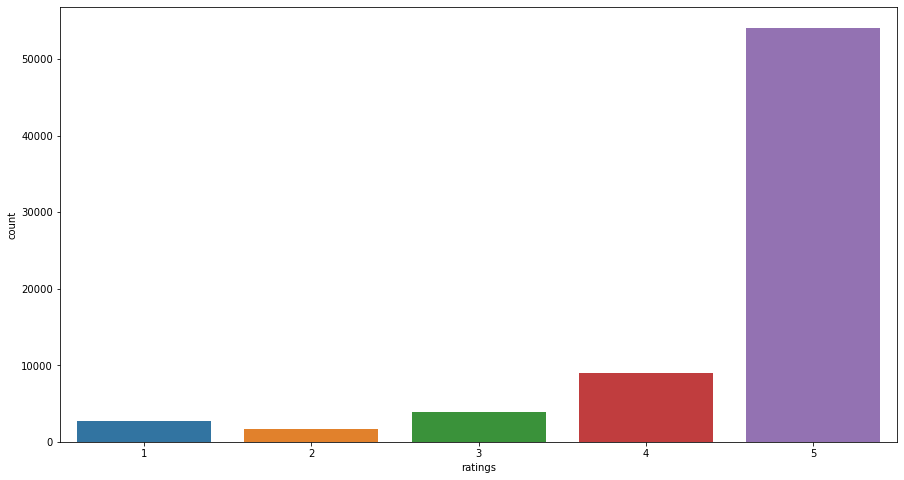

In [80]:
plt.figure(figsize = (15, 8))
sns.countplot(df4['ratings'])
plt.show()

In [81]:
print("\nTotal no of ratings :",df4.shape[0])
print("Total No of Users   :", len(np.unique(df4.reviewerID)))
print("Total No of products  :", len(np.unique(df4.productId)))


Total no of ratings : 71391
Total No of Users   : 60567
Total No of products  : 23603


In [82]:
top_rating = df4.groupby(by='reviewerID')['ratings'].count().sort_values(ascending=False)[:10]
print('Top 10 users based on ratings: \n',top_rating)

Top 10 users based on ratings: 
 reviewerID
AQ4B80F0JSBNI     194
A1GGOC9PVDXW7Z    137
A2WQY1B8ZS7QRZ    119
A2HXYN2R7W1UQW     79
A3QS1EPDZTLPWS     75
A9Q28YTLYREO7      72
A70WPHE33U5B       66
ADJEVNGP6WI45      66
A3QEYUMYBIXQ4J     49
A1F89OE7BAM7EL     47
Name: ratings, dtype: int64


In [83]:
new_df=df4.groupby("productId").filter(lambda x:x['ratings'].count() >=50)
new_df

,reviewerID,productId,ratings
89,A3F8J3VENCIIOA,B000002TTH,5
90,A2C08JSWE3GCEJ,B000002TTH,5
91,AVYMBTCXYREXE,B000002TTH,4
92,A2YCQQASXAVV3R,B000002TTH,5
93,A1WZ4YX5PROO7G,B000002TTH,5
...,...,...,...
29220,A2WJ4YORQQKTE2,B01G4DH4AU,5
29221,A36O8MIBDR2Y9K,B01G4DH4AU,5
29222,A3G1XTZ41W5TAZ,B01G4DH4AU,5
29223,A2NQJT3CVSD2Y4,B01G4DH4AU,5


In [84]:
new_df1=new_df.head(10000)

ratings_matrix = new_df1.pivot_table(values='ratings', index='productId', columns='reviewerID', fill_value=0)
ratings_matrix.head()

reviewerID,A10005QPZS2TCW,A100DFH9N1KS7T,A101L8GOGOYMRU,A101RJ22EBXAID,A101SXVBM3YFBV,A1024W3JM461N0,A1027XZIGGL074,A102WFR1ETTRB6,A103K3VHFI6B5N,A106KDKKO1VCB8,...,AZVL78AX0YKKV,AZVMFM8M40KZK,AZVP8BBWWMB21,AZVSVPI8LA2BM,AZVWWKF0C5DXC,AZWQU85GW7ANF,AZXFS8GCTSQ5R,AZZ69W8AU7WTR,AZZL199Q879FU,AZZT8ZV8KK7LE
productId,,,,,,,,,,,,,,,,,,,,,
B000002TTH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B000007UVW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B000007W4Z,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000G4QD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000I7LP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
print('Shape of the pivot table: ', ratings_matrix.shape)

Shape of the pivot table:  (66, 9783)


In [86]:
X = ratings_matrix

In [87]:
X.shape

(66, 9783)

In [88]:
%%time
from sklearn.decomposition import TruncatedSVD       # used for dimensionality reduction
SVD = TruncatedSVD(n_components=5)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

CPU times: total: 641 ms
Wall time: 525 ms


(66, 5)

In [89]:
decomposed_matrix

array([[ 1.09732858e-06,  4.76750269e-05,  1.41591602e-05,
        -1.87290365e-05,  7.35350986e-05],
       [ 3.79523321e-04,  5.49621402e-04,  1.30161776e-03,
         7.25029885e-05,  5.99595191e-03],
       [ 3.05192709e-06,  2.09875260e-04,  5.72300951e-06,
        -2.15180365e-05,  9.66622575e-04],
       [ 3.39925707e-08,  1.64599443e-06, -2.24772524e-06,
         5.03012307e-06,  1.28440472e-04],
       [ 3.68567482e-04, -4.53979111e-05,  9.15418281e-04,
        -1.28919860e-05,  1.56732752e-03],
       [ 1.07303028e-03,  4.88026006e-04,  8.15789231e-02,
         1.90443703e-04, -1.85981755e-03],
       [-2.22223936e-07, -8.16934759e-06,  1.82346045e-05,
        -1.71287173e-06,  3.83149131e-04],
       [-1.13294861e-06, -1.17362353e-07, -1.81862604e-05,
         1.25044223e-05, -8.15691655e-04],
       [-3.00007278e-07,  5.01005910e-06,  6.83411508e-07,
         5.09343995e-06,  1.24794214e-04],
       [ 4.60825020e-06, -1.25014008e-05, -1.81798634e-05,
         5.59471544e-05

In [90]:
%%time
correlation_matrix = np.corrcoef(decomposed_matrix)        # Return Pearson product-moment correlation coefficients.
correlation_matrix.shape

CPU times: total: 0 ns
Wall time: 0 ns


(66, 66)

In [91]:
l = list(X.index)

- The Pearson product-moment correlation coefficient (or Pearson correlation coefficient) is a measure of the strength of a linear association between two variables

In [92]:
def recommend(s):
    l = list(X.index)
    h = l.index(s)
    i=X.index[h]
    correlation_product_ID = correlation_matrix[h]
    Recommend = list(X.index[correlation_product_ID > 0.05])
    Recommend.remove(i)
    print(Recommend[0:5])

In [93]:
s = 'B000007W4Z'

In [94]:
k = recommend(s)

['B000002TTH', 'B000007UVW', 'B00000G4QD', 'B00000I7LP', 'B000026GO2']


In [95]:
k = ['B000002TTH', 'B000007UVW', 'B00000G4QD', 'B0000AMKBI', 'B0007OTWRQ']

In [96]:
j = df[df.asin == 'B000002TTH']['title'].values
j[0]

'Promised Land'

In [97]:
p = []
for i in k:
    j = df[df.asin == i]['title'].values
    p.append(j[0])

In [98]:
p

['Promised Land', 'Imaginos', 'U 2 Can Yodel', 'JMac', 'Susie Suh/Susie Suh']

In [99]:
j[0]

'Susie Suh/Susie Suh'

In [100]:
df.columns

Index(['Unnamed: 0', 'asin', 'title', 'overall', 'brand', 'rank', 'verified',
       'reviewerID', 'reviewerName', 'reviewTime', 'price', 'style',
       'category', 'also_buy', 'also_view', 'main_cat', 'Review', 'Sentiment',
       'unixReviewTime'],
      dtype='object')

In [101]:
df[['title', 'asin']]

,title,asin
0,Live...Again,7019098606
1,Live...Again,7019098606
2,Live...Again,7019098606
3,Live...Again,7019098606
4,Live...Again,7019098606
...,...,...
79496,Philip Glass - Prophecies,B01HDRMCXK
79497,Philip Glass - Prophecies,B01HDRMCXK
79498,Sound Mirrors,B01HF1Z5JW
79499,Sound Mirrors,B01HF1Z5JW


### <div class="alert alert-info">Interpretation
**- From the above recomendation system we can see by using the correlation matrix the products are recomended based on the related product so this will help the customers to find the related products and it will generate the good revenue for the company aswell**

## Conclusion

**- SENTIMENTAL ANALYSIS**
- Model is able to detect and translate all the languages to English
- Model is able to Automate Sentiment Predictions

**- CLUSTERING**
- Model is able to segregate top and bottom products
- Model is able to create segments based on customer perceptions

**- PRODUCT RECOMMENDATION**
- Model is able to recommend related products based on customer purchase
- Model is able to forecast future trend of the sentiments